## Variety of models for SDSS data

In [1]:
import os                       # accessing directory structure
import numpy as np              # linear algebra
import pandas as pd             # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting
import seaborn as sns           # plotting

In [2]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [3]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/Skyserver_12_30_2019 4_49_58 PM.csv


In [4]:
from IPython.display import Image
%matplotlib inline

In [5]:
df = pd.read_csv('/kaggle/input/Skyserver_12_30_2019 4_49_58 PM.csv')
df.head(10)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237666301628060000,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,4849,301,5,771,8168632633242440000,STAR,0.000115,7255,56597,832
1,1237673706652430000,116.303083,42.455980,18.47633,17.30546,17.24116,17.32780,17.37114,6573,301,6,220,9333948945297330000,STAR,-0.000093,8290,57364,868
2,1237671126974140000,172.756623,-8.785698,16.47714,15.31072,15.55971,15.72207,15.82471,5973,301,1,13,3221211255238850000,STAR,0.000165,2861,54583,42
3,1237665441518260000,201.224207,28.771290,18.63561,16.88346,16.09825,15.70987,15.43491,4649,301,3,121,2254061292459420000,GALAXY,0.058155,2002,53471,35
4,1237665441522840000,212.817222,26.625225,18.88325,17.87948,17.47037,17.17441,17.05235,4649,301,3,191,2390305906828010000,GALAXY,0.072210,2123,53793,74
5,1237668294987420000,178.334659,20.751715,15.44680,13.88656,13.06969,12.68676,12.42432,5313,301,6,125,2831738116518210000,GALAXY,0.020701,2515,54180,363
6,1237668294985060000,172.597478,20.552722,19.10002,17.10998,16.05751,15.63390,15.26723,5313,301,6,89,2812665437882440000,GALAXY,0.130948,2498,54169,609
7,1237668294984930000,172.309005,20.581135,16.89111,16.29741,16.25994,16.86333,16.77033,5313,301,6,87,2814772926945980000,GALAXY,0.004703,2500,54178,84
8,1237669517979620000,2.117128,7.663761,17.82389,16.75859,16.30879,16.13584,16.07477,5598,301,4,129,12733034184836400000,STAR,-0.000355,11309,58428,844
9,1237658423557820000,169.129790,7.152575,17.47752,16.23605,15.61560,15.29749,15.03419,3015,301,3,367,1820656067877560000,GALAXY,0.037549,1617,53112,276


In [6]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 100000 rows and 18 columns


In [7]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [8]:
# Store columns in a list, might will be helpful later
cols = list(df.columns)
cols

['objid',
 'ra',
 'dec',
 'u',
 'g',
 'r',
 'i',
 'z',
 'run',
 'rerun',
 'camcol',
 'field',
 'specobjid',
 'class',
 'redshift',
 'plate',
 'mjd',
 'fiberid']

In [9]:
# Our labels
df['class'].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

In [10]:
# Let's see how the classes are distributed 
df['class'].value_counts()

GALAXY    51323
STAR      38096
QSO       10581
Name: class, dtype: int64

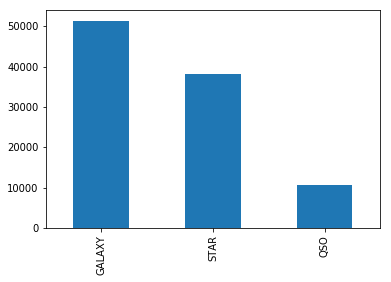

In [11]:
# Visualization with Matplotlib
df['class'].value_counts().plot(kind='bar')

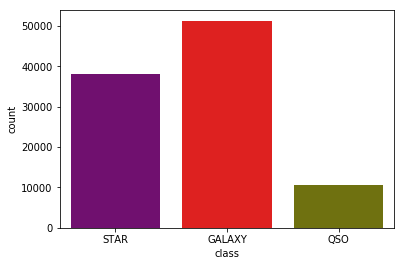

In [12]:
# Visualization with Seaborn
sns.countplot(x='class', data=df, palette="brg")
plt.show()

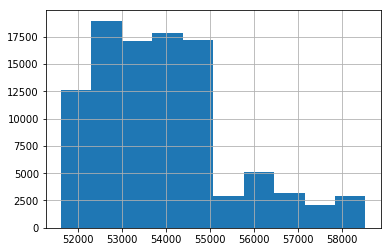

In [13]:
df['mjd'].hist()

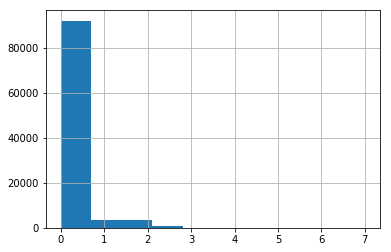

In [14]:
df['redshift'].hist()

In [15]:
# Let's find missing values
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

## Encoding class labels
For some cases, we cannot simply provide categorical values (just strings). Instead, we can convert them to numerical values.
For example, since we have 3 classes, we able to assign to each class some values, so that:

* 0 is for GALAXY
* 1 is for QSO
* 2 is for STAR.

In [16]:
# Mapping classes to 0,1,2 values
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['class']))}
class_mapping

{'GALAXY': 0, 'QSO': 1, 'STAR': 2}

In [17]:
df['class'] = df['class'].map(class_mapping)
df

# now we see class column with numerical (0,1,2) values

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237666301628060000,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,4849,301,5,771,8168632633242440000,2,0.000115,7255,56597,832
1,1237673706652430000,116.303083,42.455980,18.47633,17.30546,17.24116,17.32780,17.37114,6573,301,6,220,9333948945297330000,2,-0.000093,8290,57364,868
2,1237671126974140000,172.756623,-8.785698,16.47714,15.31072,15.55971,15.72207,15.82471,5973,301,1,13,3221211255238850000,2,0.000165,2861,54583,42
3,1237665441518260000,201.224207,28.771290,18.63561,16.88346,16.09825,15.70987,15.43491,4649,301,3,121,2254061292459420000,0,0.058155,2002,53471,35
4,1237665441522840000,212.817222,26.625225,18.88325,17.87948,17.47037,17.17441,17.05235,4649,301,3,191,2390305906828010000,0,0.072210,2123,53793,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1237667968033620000,228.674917,19.179460,19.32631,18.82748,18.65659,18.60481,18.60917,5237,301,5,134,4448615345201370000,1,0.438182,3951,55681,672
99996,1237664818210470000,173.757382,36.441603,18.33687,17.30365,17.16037,17.14895,17.14419,4504,301,2,111,2265404129658560000,2,-0.000497,2012,53493,340
99997,1237664295297290000,205.426531,38.499053,17.50690,15.63152,15.22328,15.04469,15.28668,4382,301,4,97,2257446413900210000,0,0.004587,2005,53472,62
99998,1237656537513130000,337.135144,-9.635967,19.33946,17.21436,16.29697,15.86745,15.51556,2576,301,2,105,811847537492257000,0,0.084538,721,52228,268


In [18]:
# Invariant back to original
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['class'] = df['class'].map(inv_class_mapping)
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237666301628060000,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,4849,301,5,771,8168632633242440000,STAR,0.000115,7255,56597,832
1,1237673706652430000,116.303083,42.455980,18.47633,17.30546,17.24116,17.32780,17.37114,6573,301,6,220,9333948945297330000,STAR,-0.000093,8290,57364,868
2,1237671126974140000,172.756623,-8.785698,16.47714,15.31072,15.55971,15.72207,15.82471,5973,301,1,13,3221211255238850000,STAR,0.000165,2861,54583,42
3,1237665441518260000,201.224207,28.771290,18.63561,16.88346,16.09825,15.70987,15.43491,4649,301,3,121,2254061292459420000,GALAXY,0.058155,2002,53471,35
4,1237665441522840000,212.817222,26.625225,18.88325,17.87948,17.47037,17.17441,17.05235,4649,301,3,191,2390305906828010000,GALAXY,0.072210,2123,53793,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1237667968033620000,228.674917,19.179460,19.32631,18.82748,18.65659,18.60481,18.60917,5237,301,5,134,4448615345201370000,QSO,0.438182,3951,55681,672
99996,1237664818210470000,173.757382,36.441603,18.33687,17.30365,17.16037,17.14895,17.14419,4504,301,2,111,2265404129658560000,STAR,-0.000497,2012,53493,340
99997,1237664295297290000,205.426531,38.499053,17.50690,15.63152,15.22328,15.04469,15.28668,4382,301,4,97,2257446413900210000,GALAXY,0.004587,2005,53472,62
99998,1237656537513130000,337.135144,-9.635967,19.33946,17.21436,16.29697,15.86745,15.51556,2576,301,2,105,811847537492257000,GALAXY,0.084538,721,52228,268


In [19]:
# Labels encoding with special Scikit Learn function
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
y = class_le.fit_transform(df['class'].values)
print(y)
print('We have {} values'.format(len(y)))

[2 2 2 ... 0 0 2]
We have 100000 values


In [20]:
# Our target
print(y)

# We prepare data on which we will train and test
# Labels column should be excluded
df = df.drop(columns=['class'])
df

[2 2 2 ... 0 0 2]


,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,1237666301628060000,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,4849,301,5,771,8168632633242440000,0.000115,7255,56597,832
1,1237673706652430000,116.303083,42.455980,18.47633,17.30546,17.24116,17.32780,17.37114,6573,301,6,220,9333948945297330000,-0.000093,8290,57364,868
2,1237671126974140000,172.756623,-8.785698,16.47714,15.31072,15.55971,15.72207,15.82471,5973,301,1,13,3221211255238850000,0.000165,2861,54583,42
3,1237665441518260000,201.224207,28.771290,18.63561,16.88346,16.09825,15.70987,15.43491,4649,301,3,121,2254061292459420000,0.058155,2002,53471,35
4,1237665441522840000,212.817222,26.625225,18.88325,17.87948,17.47037,17.17441,17.05235,4649,301,3,191,2390305906828010000,0.072210,2123,53793,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1237667968033620000,228.674917,19.179460,19.32631,18.82748,18.65659,18.60481,18.60917,5237,301,5,134,4448615345201370000,0.438182,3951,55681,672
99996,1237664818210470000,173.757382,36.441603,18.33687,17.30365,17.16037,17.14895,17.14419,4504,301,2,111,2265404129658560000,-0.000497,2012,53493,340
99997,1237664295297290000,205.426531,38.499053,17.50690,15.63152,15.22328,15.04469,15.28668,4382,301,4,97,2257446413900210000,0.004587,2005,53472,62
99998,1237656537513130000,337.135144,-9.635967,19.33946,17.21436,16.29697,15.86745,15.51556,2576,301,2,105,811847537492257000,0.084538,721,52228,268


In [21]:
# We need to normalize the data, to not have bias of huge values

from sklearn import preprocessing

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

## Split

In [22]:
X = df

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

In [24]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
78689,0.629953,0.367508,0.325542,0.904862,0.754886,0.342696,0.329850,0.360350,0.629952,0.0,0.6,0.112255,0.189218,0.010345,0.189210,0.318241,0.381381
76423,0.965061,0.000815,0.132501,0.927037,0.760597,0.346562,0.340552,0.378037,0.965106,0.0,0.2,0.013388,0.206178,0.000595,0.206173,0.399712,0.294294
86945,0.264982,0.478146,0.750662,0.414007,0.358226,0.154598,0.149306,0.148304,0.264994,0.0,0.2,0.289392,0.059894,0.002080,0.059893,0.113915,0.023023
57427,0.469896,0.528344,0.597278,0.967067,0.722116,0.311421,0.295420,0.314174,0.469887,0.0,0.6,0.195675,0.104055,0.016004,0.104048,0.217304,0.322322
34616,0.554691,0.655861,0.411627,0.796936,0.673173,0.311395,0.302032,0.328231,0.554700,0.0,0.4,0.764161,0.166398,0.005624,0.166390,0.280894,0.393393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50057,0.278082,0.689417,0.183103,0.981025,0.782286,0.343202,0.326388,0.355164,0.278033,0.0,1.0,0.023687,0.007176,0.018130,0.007170,0.009084,0.279279
98047,0.463548,0.548895,0.257641,0.969098,0.826781,0.373866,0.356371,0.390303,0.463554,0.0,0.4,0.101957,0.133692,0.017965,0.133689,0.418025,0.153153
5192,0.473963,0.677936,0.460709,0.918052,0.867438,0.434572,0.446627,0.519346,0.473985,0.0,0.2,0.120494,0.414638,0.000531,0.414619,0.596395,0.929930
77708,0.586121,0.049786,0.349552,0.993778,0.763865,0.330571,0.313756,0.335680,0.586117,0.0,0.6,0.042225,0.425462,0.009778,0.425461,0.612833,0.107107


# Models

## Decision Trees

In [25]:
from sklearn.tree import DecisionTreeClassifier

model_dtc = DecisionTreeClassifier(random_state=49)

model_dtc.fit(X_train, y_train)

accuracies = {}

acc = model_dtc.score(X_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 98.45%


## Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression() # default parameters

model_lr.fit(X_train,y_train)

y_pred = model_lr.predict(X_test)

acc = model_lr.score(X_test,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 88.34%


In [27]:
print(y_pred)
print(y_test)

[2 2 2 ... 0 0 0]
[0 2 2 ... 0 0 0]


In [28]:
from sklearn.metrics import classification_report, confusion_matrix

print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
lr_train_acc = model_lr.score(X_train, y_train)
print('Training Score: ', lr_train_acc)
lr_test_acc = model_lr.score(X_test, y_test)
print('Testing Score: ', lr_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.92      0.89     10253
           1       0.99      0.88      0.93      2124
           2       0.88      0.84      0.86      7623

    accuracy                           0.88     20000
   macro avg       0.91      0.88      0.89     20000
weighted avg       0.89      0.88      0.88     20000

Confusion Matrix: 
 [[9398   11  844]
 [ 233 1859   32]
 [1211    1 6411]]
Training Score:  0.8827875
Testing Score:  0.8834


## Support Vector Machines (SVM)

In [29]:
from sklearn.svm import SVC

model_svm = SVC(random_state = 1)

model_svm.fit(X_train, y_train)

acc = model_svm.score(X_test,y_test)*100

accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

# Attention: Slow model

Test Accuracy of SVM Algorithm: 88.67%


## Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()

model_nb.fit(X_train, y_train)

acc = model_nb.score(X_test,y_test)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 97.31%


In [31]:
y_pred = model_nb.predict(X_test)

In [32]:
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
lr_train_acc = model_lr.score(X_train, y_train)
print('Training Score: ', lr_train_acc)
lr_test_acc = model_lr.score(X_test, y_test)
print('Testing Score: ', lr_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.97      0.98     10253
           1       0.89      0.93      0.91      2124
           2       0.99      0.98      0.99      7623

    accuracy                           0.97     20000
   macro avg       0.95      0.96      0.96     20000
weighted avg       0.97      0.97      0.97     20000

Confusion Matrix: 
 [[9992  185   76]
 [ 148 1975    1]
 [  67   60 7496]]
Training Score:  0.8827875
Testing Score:  0.8834


## KNN Neighbours

In [33]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors = 3)  # n_neighbors means k
model_knn.fit(X_train, y_train)
prediction = model_knn.predict(X_test)

print("{} NN Score: {:.2f}%".format(3, model_knn.score(X_test, y_test)*100))

3 NN Score: 88.28%


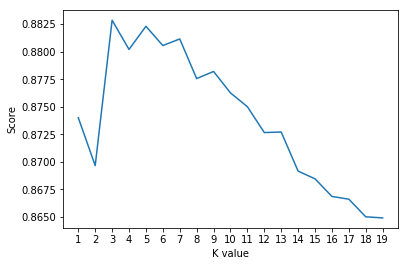

Maximum KNN Score is 88.28%


In [34]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

## Tasks to do:
* Class weights for class imbalance
* ANN models